<a href="https://colab.research.google.com/github/bcguilherme/arima-temperature/blob/main/arima_temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Importing Libraries:

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from statsmodels.tsa.arima.model import  ARIMA

2. Installing Required Packages:

In [ ]:
!pip install scipy

In [ ]:
!pip install pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.5 MB/s eta 0:00:00


In [ ]:
from pmdarima.arima import auto_arima


3. Reading Data:

In [ ]:
df = pd.read_excel('/content/temperature.xlsx', index_col='Date', parse_dates=True)

4. Data Manipulation:

In [ ]:
import pandas as pd



df['New Column'] = df['Daily minimum temperatures'].astype(float)



df['Daily minimum temperatures'] = df['Daily minimum temperatures'].astype(float)



5. Exploratory Data Analysis:

In [ ]:
df.sort_index(inplace=True)

In [ ]:
df.head()

,Date,Daily minimum temperatures
0,1981-01-01 00:00:00,20.7
1,1981-02-01 00:00:00,17.9
2,1981-03-01 00:00:00,18.8
3,1981-04-01 00:00:00,14.6
4,1981-05-01 00:00:00,15.8


In [ ]:
df.shape


(3647, 1)

In [ ]:
df.describe()

,Daily minimum temperatures
count,3647.000000
mean,11.186647
std,4.061671
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


In [ ]:
df.index.min(), df.index.max()


(Timestamp('1981-01-01 00:00:00'), Timestamp('1990-12-31 00:00:00'))

6. Data Visualization:

In [ ]:
df.columns = ['temperatures']


<Axes: xlabel='Date'>

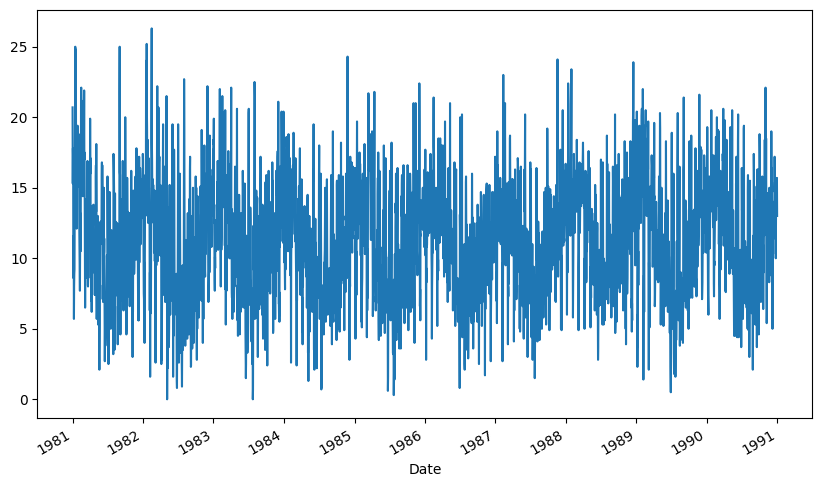

In [ ]:
df['Daily minimum temperatures'].plot(figsize=(10,6))


7. Time Series Decomposition:

<Figure size 800x600 with 0 Axes>

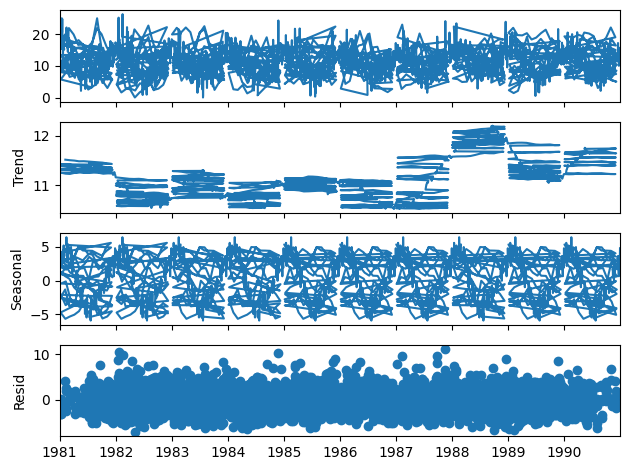

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

resultado = seasonal_decompose(df, model ='add', period=365)

fig = plt.figure(figsize=(8, 6))
fig = resultado.plot()


8. Augmented Dickey-Fuller Test:

In [ ]:
from statsmodels.tsa.stattools import adfuller

result=adfuller(df['Daily minimum temperatures'].dropna())
print(f'Teste ADF:{result[0]}')
print(f'p-valor:{result[1]}')

Teste ADF:-3.331541412968857
p-valor:0.01352611219545271


In [ ]:
from statsmodels.tsa.stattools import adfuller

result=adfuller(df['Daily minimum temperatures'].diff().dropna())
print(f'Teste ADF:{result[0]}')
print(f'p-valor:{result[1]}')


Teste ADF:-26.18222791476834
p-valor:0.0


9. Auto ARIMA Model:

In [ ]:
import pandas as pd
from pmdarima.arima import auto_arima

time_series = df['Daily minimum temperatures']

fit_arima = auto_arima(time_series, d=1, start_p=1, start_q=1, max_p=3, max_q=3,
                      seasonal=True, m=6, D=1, start_P=1, start_Q=1, max_P=2, max_Q=2,
                      information_criterion='aic', trace=True, error_action='ignore', stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[6]             : AIC=inf, Time=20.32 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=22211.573, Time=0.13 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=20978.709, Time=0.81 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=inf, Time=4.76 sec
 ARIMA(1,1,0)(0,1,0)[6]             : AIC=22068.931, Time=0.14 sec
 ARIMA(1,1,0)(2,1,0)[6]             : AIC=20482.431, Time=1.24 sec
 ARIMA(1,1,0)(2,1,1)[6]             : AIC=inf, Time=14.54 sec
 ARIMA(1,1,0)(1,1,1)[6]             : AIC=inf, Time=7.62 sec
 ARIMA(0,1,0)(2,1,0)[6]             : AIC=20662.364, Time=1.09 sec
 ARIMA(2,1,0)(2,1,0)[6]             : AIC=20418.687, Time=2.20 sec
 ARIMA(2,1,0)(1,1,0)[6]             : AIC=20927.151, Time=1.24 sec
 ARIMA(2,1,0)(2,1,1)[6]             : AIC=inf, Time=22.36 sec
 ARIMA(2,1,0)(1,1,1)[6]             : AIC=inf, Time=10.80 sec
 ARIMA(3,1,0)(2,1,0)[6]             : AIC=20352.684, Time=2.53 sec
 ARIMA(3,1,0)(1,1,0)[6]             : AIC=20872.994

In [ ]:
endog = df['Daily minimum temperatures']


10. SARIMAX Model:

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

endog = df['Daily minimum temperatures']
model = SARIMAX(endog, order=(3, 1, 0), seasonal_order=(2, 1, 0, 6))
resultado_sarimax = model.fit()


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(time_series, order=(3, 1, 0), seasonal_order=(2, 1, 0, 6))
resultado_sarimax = model.fit()

#11 Model Summary and Prediction:

predicoes = resultado_sarimax.get_prediction(start=-60)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
resultado_sarimax.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:        Daily minimum temperatures   No. Observations:                 3647
Model:             SARIMAX(3, 1, 0)x(2, 1, 0, 6)   Log Likelihood              -10170.342
Date:                           Thu, 12 Oct 2023   AIC                          20352.684
Time:                                   17:26:36   BIC                          20389.883
Sample:                                        0   HQIC                         20365.933
                                          - 3647                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2718      0.016    -16.992      0.000      -0.303      -0.240
ar.L2         -0.1699      0.016    -10.713      0.000      -0.201      -0.139
ar.L3         -0.1370      0.016     -8.468      0.000      -0.169      -0.105
ar.S.L6       -0.7158      0.015    -47.236      0.000      -0.746      -0.686
ar.S.L12      -0.3666      0.015    -23.968      0.000      -0.397      -0.337
sigma2        15.6300      0.329     47.446      0.000      14.984      16.276
===================================================================================
Ljung-Box (L1) (Q):                   1.07   Jarque-Bera (JB):                37.89
Prob(Q):                              0.30   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                             0.03
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

12. Visualization of Predictions:

In [ ]:
predicoes = resultado_sarimax.get_prediction(start=-60)
predicao_media = predicoes.predicted_mean

In [ ]:
predicao_media = predicoes.predicted_mean
intervalo_confianca = predicoes.conf_int()


In [ ]:
predicao_media[0]


24.323367002573708

In [ ]:
datas_previsao = np.asarray(predicao_media.index)
datas = np.asarray(df.index)

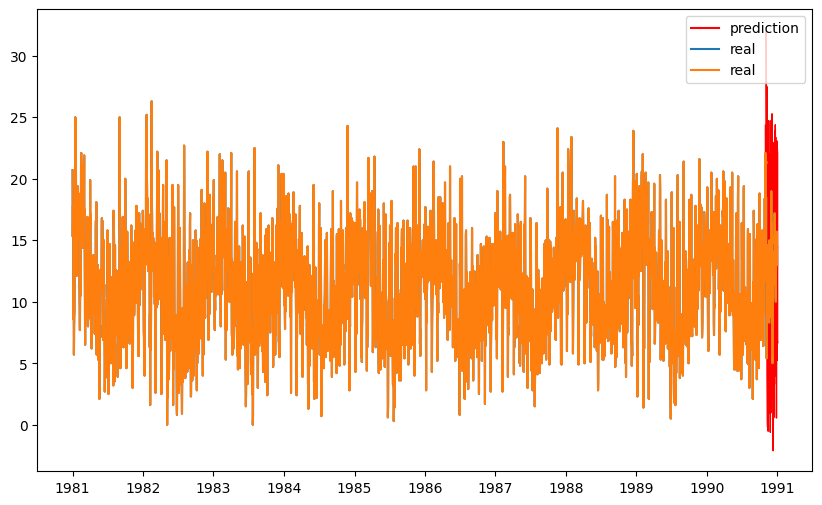

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(datas_previsao,predicao_media.values,color='red',label='prediction')
plt.fill_between(datas_previsao, limites_abaixo, limites_acima, color='red')
plt.plot(datas, df.values, label='real')
plt.legend()
plt.show()